In [15]:
import pstats
import cProfile
import numpy as np
import cbm_methods as cbm

mean1, mean2 = 1.0, 5.0  # Means of the two normal distributions
std_dev1, std_dev2 = 1.0, 1.9  # Standard deviations of the two normal distributions
size = 200  # Number of samples

# Generate samples from the two normal distributions
data1 = np.random.normal(loc=mean1, scale=std_dev1, size=int(size/2))
data2 = np.random.normal(loc=mean2, scale=std_dev2, size=int(size/2))

# Combine the samples to create a pseudobimodal distribution
data = np.concatenate((data1, data2))

bw = 0.45730505192732634 * np.std(data)
itol = bw
mtol = bw/10
m, M =np.min(data), np.max(data)

In [2]:


# Assume cbm.recursive_rootfinding is your Cython-implemented function
def profile_recursive_rootfinding(runs):
    for _ in range(runs):
        cbm.recursive_rootfinding(m, M, itol,mtol, data, bw)

# Number of runs
num_runs = 1000

# Profile the wrapper function
cProfile.run('profile_recursive_rootfinding(num_runs)', filename='profile_results')

# Load and print profiling results
p = pstats.Stats('profile_results')
p.strip_dirs().sort_stats('tottime').print_stats(10)

Sat Jun 15 07:58:00 2024    profile_results

         241004 function calls (211004 primitive calls) in 1.211 seconds

   Ordered by: internal time
   List reduced from 14 to 10 due to restriction <10>

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
    32000    1.111    0.000    1.117    0.000 cbm_methods.pyx:28(first_deriv_pdf)
31000/1000    0.053    0.000    1.207    0.001 cbm_methods.pyx:172(recursive_rootfinding)
    32000    0.015    0.000    0.020    0.000 stringsource:345(__cinit__)
    32000    0.013    0.000    0.033    0.000 stringsource:657(memoryview_cwrapper)
    32000    0.006    0.000    0.006    0.000 stringsource:372(__dealloc__)
    32000    0.006    0.000    0.006    0.000 stringsource:298(align_pointer)
    32000    0.003    0.000    0.003    0.000 stringsource:663(memoryview_check)
        1    0.003    0.003    1.211    1.211 2902803868.py:2(profile_recursive_rootfinding)
    16000    0.001    0.000    0.001    0.000 cbm_methods.pyx:63(is

In [16]:
n = len(data)
std_dev = np.std(data)
scotts_factor = np.power(n, -1.0 / 5.0) * std_dev
roots = cbm.recursive_rootfinding(m, M, itol/5,mtol, data, scotts_factor)

[1.1369178474764847, 3.912662229017478, 5.708732122955768]


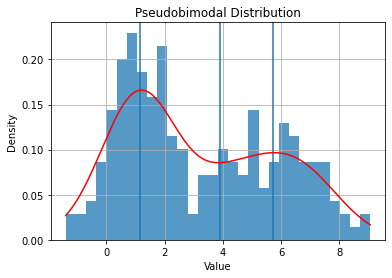

In [17]:
from matplotlib import pyplot as plt
from scipy.stats import gaussian_kde

Ms = roots[::2]
[plt.axvline(r) for r in roots]
print(roots)
#roots=cbm.recursive_rootfinding(data)
#print(roots)

# Plot the histogram to visualize the distribution
plt.hist(data, bins=30, density=True, alpha=0.75)
kde = gaussian_kde(data)
x_vals = np.linspace(min(data), max(data), 1000)
plt.plot(x_vals, kde(x_vals), 'r-', label='KDE')

plt.xlabel('Value')
plt.ylabel('Density')
plt.title('Pseudobimodal Distribution')
plt.grid(True)
plt.show()